In [2]:
import os, sys, csv
import warnings
import numpy as np
import nibabel as nb
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
def get_vectors(gradient_file,
                concordance_file,
                graymatter_file,
                lesion_file):

    # get numpy one dimensional arrays
    comp    = np.array(nb.load(gradient_file).get_data())
    conc    = np.array(nb.load(concordance_file).get_data())
    
    # get voxel coordinates on gray matter
    gm_mask = nb.load(graymatter_file).get_data()   
    x    = np.where(gm_mask==1)[0]
    y    = np.where(gm_mask==1)[1]
    z    = np.where(gm_mask==1)[2]
    
    # get voxel coordinates on the lesion side
    lesion = np.array(nb.load(lesion_file).get_data())
    x_le   = np.where(lesion==1)[0]
    y_le   = np.where(lesion==1)[1]
    z_le   = np.where(lesion==1)[2]
    
    # mask out comp and conc arrays with gray matter
    component   = comp[x,y,z]
    concordance = conc[x,y,z]
    
    # find where the lesion is on the gradient
    lesion_on_gradient = comp[x_le, y_le, z_le]
    
    # voxelwise distances to the lesion side on the gradient
    distance = np.zeros(len(component))
    for i in range(0, len(component)):        
        distance[i] = min(abs(component[i] - lesion_on_gradient))
        
    return concordance, distance

# all subjects

In [4]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()
print(len(subject_list))

28


# get behavioral measures

In [5]:
file_beh  = '/data/pt_mar006/documents/all_sd_datasummary_STEIGLITZ.xlsx'
db        = pd.read_excel(file_beh, index_col='study_id')

## linear regression between distance-to-lesion and concordance maps

### example subject

In [6]:
data_dir      = '/data/pt_mar006/subjects_masks/'
gradient_file = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'

# get subject specific concordance and distance vectors
subject_id       = 'sd33'

concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

c, d = get_vectors(gradient_file,
                   concordance_file,
                   graymatter_file,
                   lesion_file)

slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)

print slope, intercept, r_value, p_value, std_err

6.037746397626145 0.25781874875240485 0.4270235571497293 0.0 0.07026099269729127


## linear regression analysis for distances-to-lesion(G1) and concordances

In [7]:
gradient_file = '/data/pt_mar006/components/mni3_component_1.nii.gz'

rColumns = ['slope1', 'inter1']                

regres1 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres1.ix[subject_id]['slope1'] = "{:.5f}".format(slope)
    regres1.ix[subject_id]['inter1'] = "{:.5f}".format(intercept)
    

In [8]:
#regres1

## linear regression analysis for distances-to-lesion(G2) and concordances

In [9]:
gradient_file = '/data/pt_mar006/components/mni3_component_2.nii.gz'

rColumns = ['slope2', 'inter2']                

regres2 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres2.ix[subject_id]['slope2'] = "{:.5f}".format(slope)
    regres2.ix[subject_id]['inter2'] = "{:.5f}".format(intercept)
    

In [10]:
#regres2

## linear regression analysis for distances-to-lesion(G3) and concordances

In [11]:
gradient_file = '/data/pt_mar006/components/mni3_component_3.nii.gz'

rColumns = ['slope3', 'inter3']                

regres3 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres3.ix[subject_id]['slope3'] = "{:.5f}".format(slope)
    regres3.ix[subject_id]['inter3'] = "{:.5f}".format(intercept)
    

In [12]:
#regres3

# data frame for all regression slopes and behavioral scores

In [13]:
mytable = pd.concat([regres1,
                     regres2,
                     regres3,
                     db.ix[subject_list].NIHSS_admission,
                     db.ix[subject_list].NIHSS_discharge,
                     db.ix[subject_list].mRS_admission,
                     db.ix[subject_list].mRS_discharge,], axis =1)


In [14]:
mytable

,slope1,inter1,slope2,inter2,slope3,inter3,NIHSS_admission,NIHSS_discharge,mRS_admission,mRS_discharge
study_id,,,,,,,,,,
sd02,3.06682,1.03748,-1.87499,1.55089,1.35894,0.16164,6,1,2,1
sd05,2.35953,1.46278,-0.18650,0.80600,1.31353,0.04719,5,3,2,2
sd08,-0.49257,1.06809,0.89384,0.45101,-0.23465,0.37482,1,0,1,0
sd10,0.13922,0.80906,1.24525,0.53918,0.19122,0.25060,0,0,0,0
sd13,1.26165,1.50036,-0.64869,1.45076,1.28570,0.27240,7,0,4,0
sd14,3.15878,1.18375,-1.08255,1.34937,0.57587,0.23314,0,0,0,0
sd16,-3.22613,2.75745,2.84224,0.26169,0.28678,0.34989,1,0,0,0
sd17,0.55114,1.07726,2.75557,0.55011,0.43625,0.29325,3,2,2,2
sd21,1.71358,1.43599,1.32138,0.24731,1.04183,0.09888,1,0,3,2


## masks to exclude 'no' scores

In [15]:
new_nihss_adm = mytable['NIHSS_admission'].isin(['no'])
len(mytable[~new_nihss_adm])

28

In [16]:
new_nihss_dis = mytable['NIHSS_discharge'].isin(['no'])
len(mytable[~new_nihss_dis])

27

In [17]:
new_mrs_adm = mytable['mRS_admission'].isin(['no'])
len(mytable[~new_mrs_adm])

26

In [18]:
new_mrs_dis = mytable['mRS_discharge'].isin(['no'])
len(mytable[~new_mrs_dis])

26

# nihss discharge versus slope and regression

### G1 - slope and regression

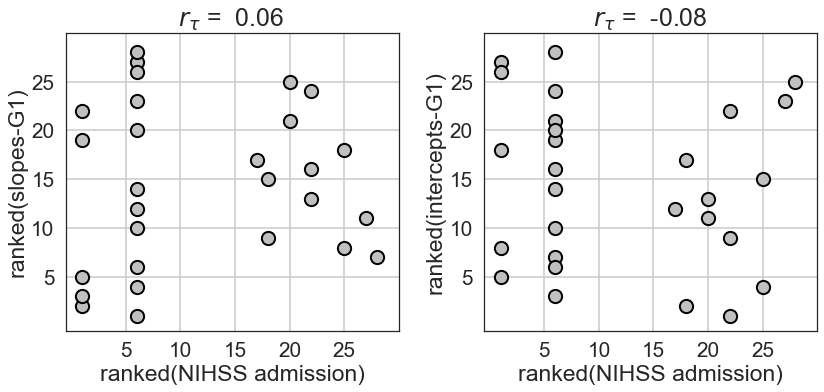

In [19]:
sns.set_context('poster', font_scale=1.3)
sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams["axes.grid"] = True

with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)

    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.slope1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )
    
    plt.title(r'$r_\tau$ =  %1.2f ' 
          %(stats.kendalltau(mytable.slope1,
                             mytable.NIHSS_admission)[0]))


    plt.ylabel('ranked(slopes-G1)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.inter1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )

    plt.title(r'$r_\tau$ =  %1.2f ' 
              %(stats.kendalltau(mytable.inter1,
                                 mytable.NIHSS_admission)[0]))
    

    plt.ylabel('ranked(intercepts-G1)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

fig.tight_layout() 

### G2 - slope and regression

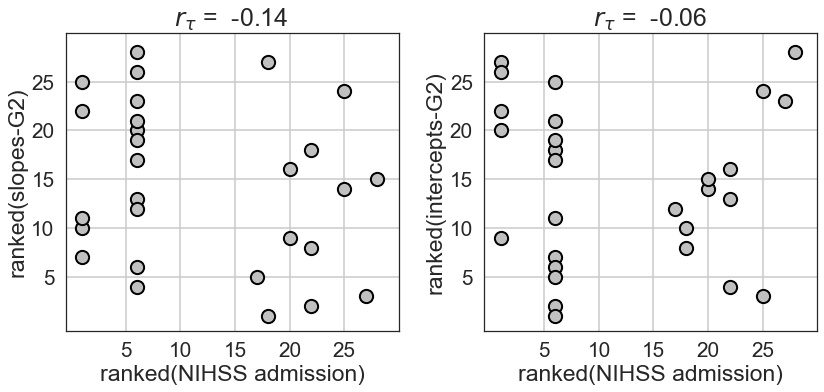

In [20]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)

    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.slope2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )                
    
    
    plt.title(r'$r_\tau$ =  %1.2f ' 
          %(stats.kendalltau(mytable.NIHSS_admission,
                             mytable.slope2)[0]))
    plt.ylabel('ranked(slopes-G2)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.inter2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )  
    

    plt.ylabel('ranked(intercepts-G2)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable.NIHSS_admission,
                                 mytable.inter2)[0]))

fig.tight_layout() 

### G3 - slope and regression

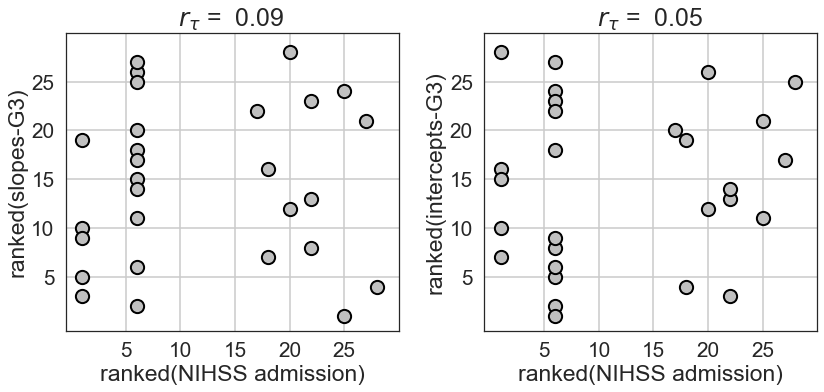

In [21]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.slope3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
               )
                    
    plt.ylabel('ranked(slopes-G3)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable.NIHSS_admission,
                                 mytable.slope3)[0]))
    

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable.NIHSS_admission, method='min'),
                stats.rankdata(mytable.inter3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )

    plt.ylabel('ranked(intercepts-G3)')
    plt.xlabel('ranked(NIHSS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    
    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable.NIHSS_admission,
                                 mytable.inter3)[0]))



fig.tight_layout() 

# NIHSS discharge

### G1 - slope and regression vs nihss discharge

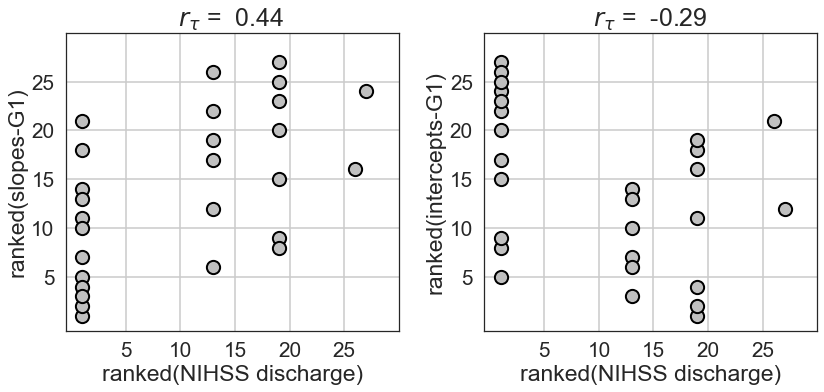

In [22]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].slope1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
                    
    plt.ylabel('ranked(slopes-G1)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    
    plt.title(r'$r_\tau$ =  %1.2f ' 
          %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                             mytable[~new_nihss_dis].slope1)[0]))
    
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].inter1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                                 mytable[~new_nihss_dis].inter1)[0]))

    plt.ylabel('ranked(intercepts-G1)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

fig.tight_layout() 

### G2 - slope and regression vs nihss discharge

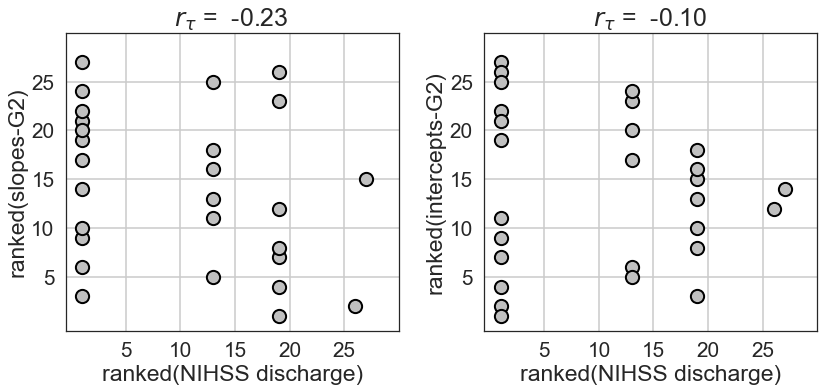

In [23]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     

    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].slope2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
                
    plt.ylabel('ranked(slopes-G2)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.title(r'$r_\tau$ =  %1.2f ' 
              %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                             mytable[~new_nihss_dis].slope2)[0]))

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].inter2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.title(r'$r_\tau$ =  %1.2f ' 
              %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                                 mytable[~new_nihss_dis].inter2)[0]))

    plt.ylabel('ranked(intercepts-G2)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

fig.tight_layout() 

### G3 - slope and regression vs nihss discharge

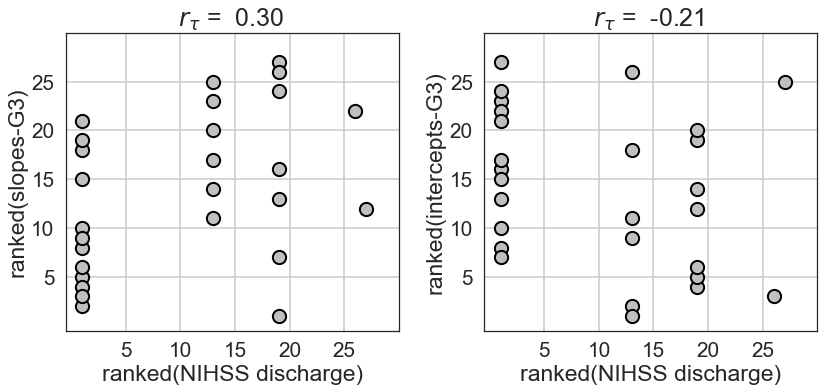

In [24]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      

    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].slope3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )     

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G3)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                                 mytable[~new_nihss_dis].slope3)[0]))

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_nihss_dis].NIHSS_discharge, method='min'),
                stats.rankdata(mytable[~new_nihss_dis].inter3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.title(r'$r_\tau$ =  %1.2f ' 
              %(stats.kendalltau(mytable[~new_nihss_dis].NIHSS_discharge,
                                 mytable[~new_nihss_dis].inter3)[0]))

    plt.ylabel('ranked(intercepts-G3)')
    plt.xlabel('ranked(NIHSS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])

fig.tight_layout() 

# mRS admission scores

### G1 - slope and regression vs mrs admission

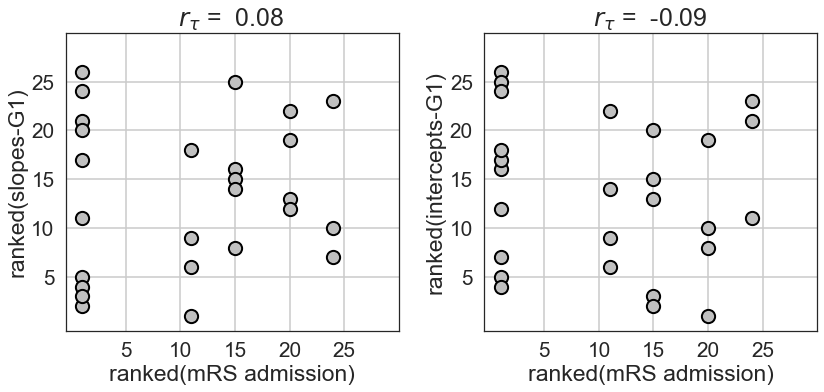

In [25]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      

    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].slope1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                ) 
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G1)')
    plt.xlabel('ranked(mRS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                                 mytable[~new_mrs_adm].slope1)[0]))
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].inter1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                ) 

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(intercepts-G1)')
    plt.xlabel('ranked(mRS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    
    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                         mytable[~new_mrs_adm].inter1))[0])


fig.tight_layout() 

### G2 - slope and regression vs mrs admission

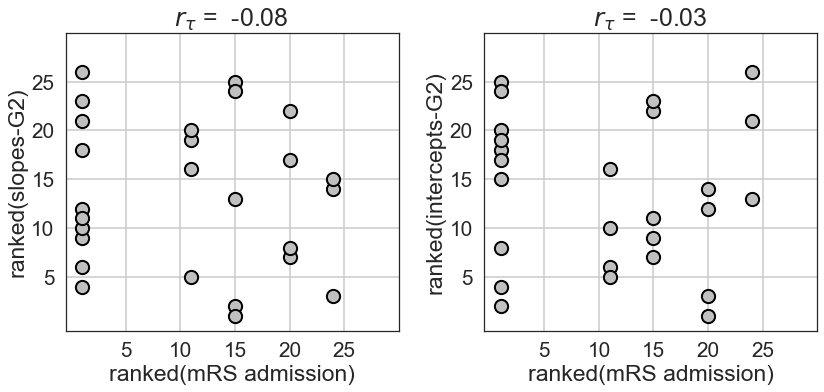

In [26]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].slope2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )     
  
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G2)')
    plt.xlabel('ranked(mRS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                                 mytable[~new_mrs_adm].slope2)[0]))

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].inter2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )     
   
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    
    plt.ylabel('ranked(intercepts-G2)')
    plt.xlabel('ranked(mRS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                                 mytable[~new_mrs_adm].inter2))[0])

fig.tight_layout() 

### G3 - slope and regression vs mrs admission

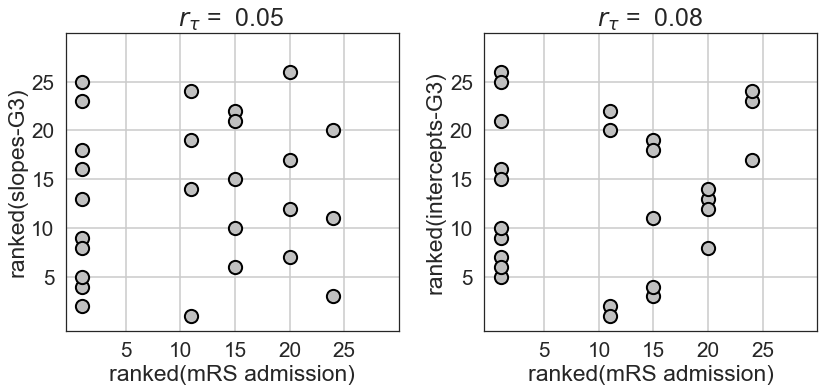

In [27]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].slope3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G3)')
    plt.xlabel('ranked(mRS admission)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                                 mytable[~new_mrs_adm].slope3)[0]))

    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_adm].mRS_admission, method='min'),
                stats.rankdata(mytable[~new_mrs_adm].inter3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(intercepts-G3)')
    plt.xlabel('ranked(mRS admission)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_adm].mRS_admission,
                                 mytable[~new_mrs_adm].inter3)[0]))

fig.tight_layout() 

# mRS discharge scores

### G1 - slope and regression vs mrs discharge

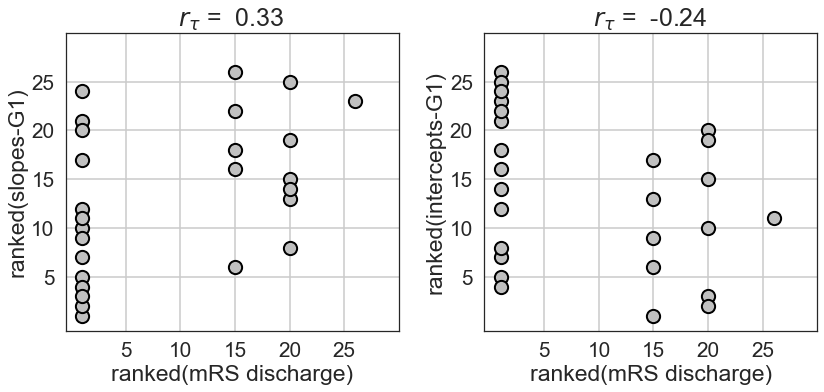

In [28]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].slope1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G1)')
    plt.xlabel('ranked(mRS discharge)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f ' 
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].slope1)[0]))
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].inter1, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(intercepts-G1)')
    plt.xlabel('ranked(mRS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    
    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].inter1)[0]))

fig.tight_layout() 

### G2 - slope and regression vs mrs discharge

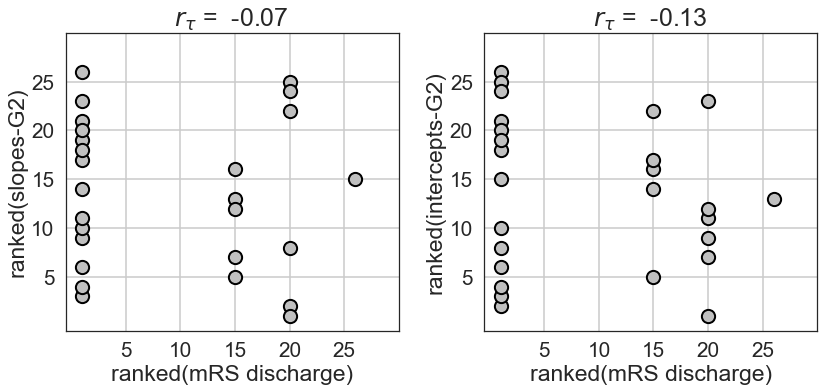

In [29]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].slope2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G2)')
    plt.xlabel('ranked(mRS discharge)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].slope2))[0])
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].inter2, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    

    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(intercepts-G2)')
    plt.xlabel('ranked(mRS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])
    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].inter2))[0])


fig.tight_layout() 

### G3 - slope and regression vs mrs discharge

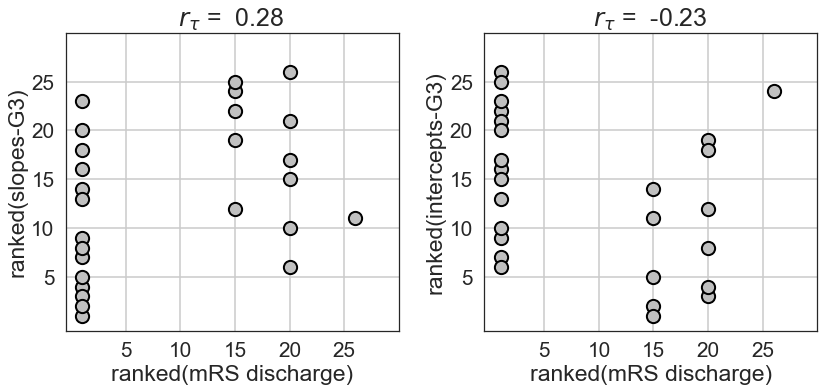

In [30]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.grid"] = True

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)      
     
    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].slope3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])

    plt.ylabel('ranked(slopes-G3)')
    plt.xlabel('ranked(mRS discharge)')
    plt.xticks([5, 10, 15, 20, 25])
    plt.yticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].slope3))[0])
    ax2 = fig.add_subplot(122)

    plt.scatter(stats.rankdata(mytable[~new_mrs_dis].mRS_discharge, method='min'),
                stats.rankdata(mytable[~new_mrs_dis].inter3, method='min'),
                facecolors = 'silver',
                edgecolors='k',
                s=175,
                linewidth=2,
                )    
    
    plt.ylim([-0.5,30])
    plt.xlim([-0.5,30])
    
    plt.ylabel('ranked(intercepts-G3)')
    plt.xlabel('ranked(mRS discharge)')
    plt.yticks([5, 10, 15, 20, 25])
    plt.xticks([5, 10, 15, 20, 25])

    plt.title(r'$r_\tau$ =  %1.2f '
              %(stats.kendalltau(mytable[~new_mrs_dis].mRS_discharge,
                                 mytable[~new_mrs_dis].inter3))[0])

fig.tight_layout() 